## Observations and Insights

## Dependencies and starter code

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
metadata = "data/Mouse_metadata.csv"
results = "data/Study_results.csv"

# Read the mouse data and the study results
metadata = pd.read_csv(metadata)
results = pd.read_csv(results)

# Combine the data into a single dataset
combined = metadata.merge(results, on="Mouse ID")
combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

## Bar plots

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summarystats = pd.DataFrame(combined.groupby("Drug Regimen").count())

#Groupby for stats by drug regime, add results to columns 
summarystats["Mean"] = pd.DataFrame(combined.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summarystats["Median"] = pd.DataFrame(combined.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summarystats["Standard Deviation"] = pd.DataFrame(combined.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summarystats["Variance"] = pd.DataFrame(combined.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summarystats["SEM"] = pd.DataFrame(combined.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

#Clean columns
summarystats = summarystats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

# #Rename to count column
summarystats = summarystats.rename(columns = {"Mouse ID" : "Count"})

summarystats.head()

,Count,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466


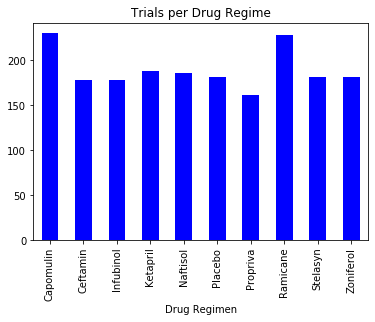

<Figure size 432x288 with 0 Axes>

In [27]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Filter DataFrame to columns
datapoints = summarystats[["Count"]]

# Use DataFrame.plot() in order to create a bar chart of the data
datapoints.plot(kind="bar", figsize=(6,4), color = "b", legend=False)
plt.title("Trials per Drug Regime")

plt.show()
plt.tight_layout()

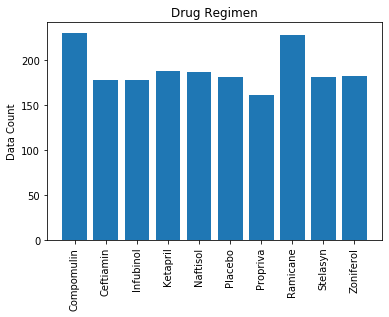

In [28]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
DrugList = ('Compomulin', 'Ceftiamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol')
yaxis = np.arange(len(DrugList))
DataCount = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

plt.bar(yaxis, DataCount, align='center', alpha=1)
plt.xticks(yaxis, DrugList)
plt.xticks(rotation=90)
plt.ylabel('Data Count')
plt.title('Drug Regimen')

plt.show()

## Pie plots

In [29]:
#  Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the distribution of female or male mice in the study.
gender_summary = combined.groupby(['Sex']).agg({"Mouse ID" :['count']})
gender_summary

,Mouse ID
,count
Sex,
Female,935
Male,958


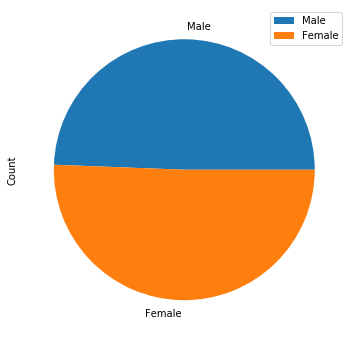

In [30]:
gender = pd.DataFrame({'Sex':['Male', 'Female'], 'Count':[935, 958]}, index=['Male', 'Female'])
piecount = gender.plot.pie(y='Count', figsize=(6,6))

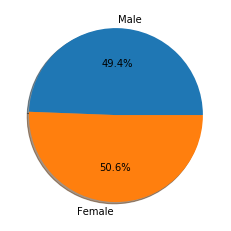

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels='Male', 'Female'
countp=[935, 958]
plt.pie(countp, labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()

## Quartiles, outliers and boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.
top_four = combined[combined["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
top_four = top_four.sort_values(["Timepoint"], ascending=True)
top_four

top_four = top_four[["Drug Regimen", "Mouse ID", "Timepoint","Weight (g)", "Tumor Volume (mm3)"]]
top_four.head()

,Drug Regimen,Mouse ID,Timepoint,Weight (g),Tumor Volume (mm3)
0,Ramicane,k403,0,16,45.0
1391,Infubinol,q132,0,30,45.0
195,Capomulin,i738,0,20,45.0
205,Ramicane,a520,0,21,45.0
1370,Ceftamin,p438,0,26,45.0


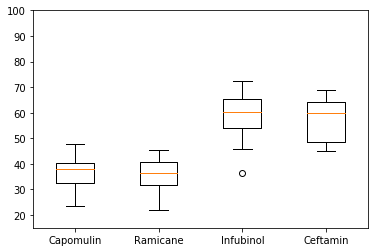

In [39]:
#  Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.
four_top = top_four.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
four_top.head()

# Create dataframe
top_treatment = four_top.to_frame()
top_treatment

# Create list for labels and dataframe
key_four = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create box plot
final_df = top_treatment.reset_index()
tumors = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_df = pd.DataFrame(tumors)
tumor_df = tumor_df.reindex(key_four)
tumor_vols = [vol for vol in tumor_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=key_four)
plt.ylim(15, 100)
plt.show()

## Line and scatter plots

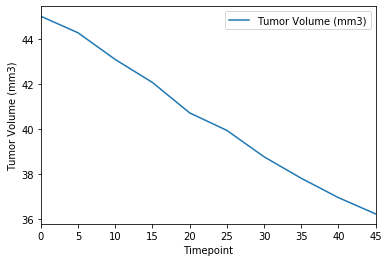

In [54]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
tumorV = combined.drop(["Mouse ID"],axis = 1)
tumor_index= tumorV.groupby(["Drug Regimen", "Timepoint"]).mean()
tumor_index = tumor_index.reset_index()

cap =tumor_index.loc[tumor_index["Drug Regimen"]=="Capomulin"]

cap.plot(kind='line',x="Timepoint",y="Tumor Volume (mm3)")
plt.ylabel('Tumor Volume (mm3)')

plt.show()

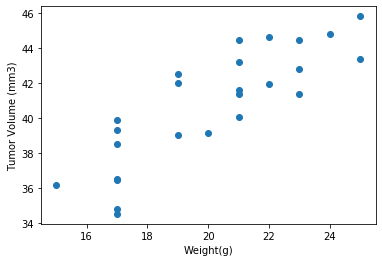

In [56]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
mouse_id = combined.groupby("Mouse ID").mean()

# Rename columns
rename = mouse_id.rename(columns={"Weight (g)":"Avg Weight","Tumor Volume (mm3)":"Avg Tumor Volume (mm3)"})

# Merge dataframes
scatter_merged = pd.merge(rename , metadata, how = "left", on="Mouse ID")

# Set index on Drug Regimen
new_index = scatter_merged.set_index("Drug Regimen")

# Create dataframe for Capomulin
scatter_cap = new_index.loc["Capomulin",:]

# Axis values & labels
x_axis = scatter_cap["Avg Weight"].tolist()
y_axis = scatter_cap["Avg Tumor Volume (mm3)"]

plt.xlabel("Weight(g)")
plt.ylabel("Tumor Volume (mm3)")

plt.scatter(x_axis , y_axis)

Correlation = 0.84


Text(0, 0.5, 'Tumor Volume (mm3)')

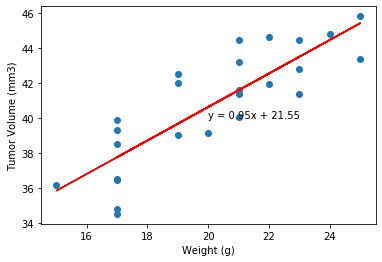

In [66]:
# Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. 
# Plot the linear regression model on top of the previous scatter plot.
avg_weight = scatter_cap["Avg Weight"]
tumor_volume = scatter_cap["Avg Tumor Volume (mm3)"]

# Pearsonr calc
correlation = st.pearsonr(weight,tumor_volume)
print(f"Correlation = {round(correlation[0],2)}")

x_values = avg_weight
y_values = tumor_volume

# Linregress 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatter and line plots
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(20,40),fontsize=10)

# Label axis
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

In [ ]:
Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.